tensor([ 58, 177, 108,  69], dtype=torch.uint8) tensor([ 58, 177, 108,  69], dtype=torch.uint8)


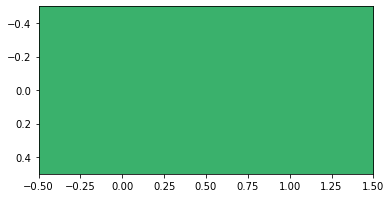

tensor([144,  48,  85,  84], dtype=torch.uint8) tensor([144,  48,  85,  84], dtype=torch.uint8)


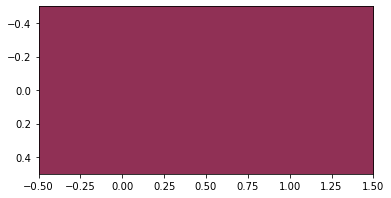

tensor([114, 173, 205,  97], dtype=torch.uint8) tensor([114, 173, 205,  97], dtype=torch.uint8)


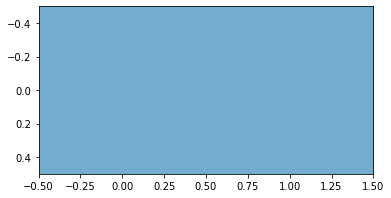

tensor([159,  48,  97,  77], dtype=torch.uint8) tensor([159,  48,  97,  77], dtype=torch.uint8)


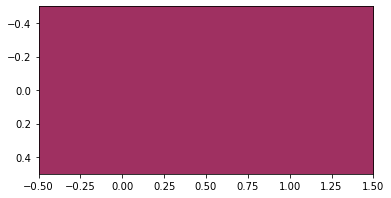

tensor([111, 146,  36,  95], dtype=torch.uint8) tensor([111, 146,  36,  95], dtype=torch.uint8)


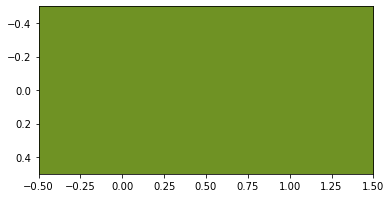

tensor([ 69,  63, 136,  84], dtype=torch.uint8) tensor([ 69,  63, 136,  84], dtype=torch.uint8)


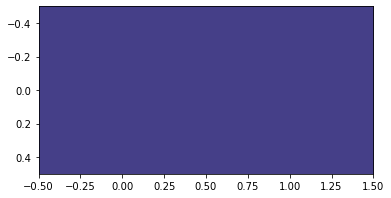

tensor([189, 156,  77,  81], dtype=torch.uint8) tensor([189, 156,  77,  81], dtype=torch.uint8)


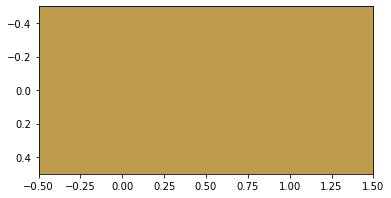

tensor([ 84,  90, 186,  85], dtype=torch.uint8) tensor([ 84,  90, 186,  85], dtype=torch.uint8)


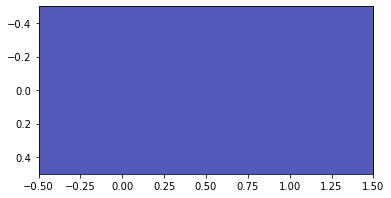

tensor([195, 168, 107,  81], dtype=torch.uint8) tensor([195, 168, 107,  81], dtype=torch.uint8)


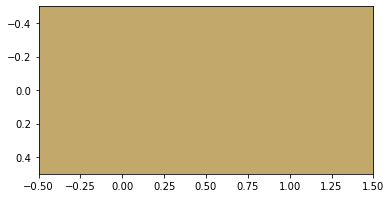

tensor([122, 128,  32,  96], dtype=torch.uint8) tensor([122, 128,  32,  96], dtype=torch.uint8)


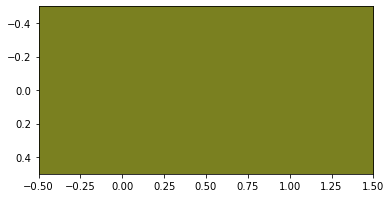

In [46]:
import torch
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

for img_path in glob("../datasets/bunny/octants/octant_0/*.png")[:10]:
    img = Image.open(img_path)
    img_data =  torch.from_numpy(np.array(img)).float() / 255

    avg_alpha = img_data[:,:,3].mean()
    avg_rgb = (img_data[:,:,:3]*img_data[:,:,3:4]).sum([0,1])/(img_data[:,:,3].sum())
    avg_color = (torch.tensor([*avg_rgb,avg_alpha])*255).byte()

    # extract avg color from rust
    rust_colors = img_path.split("/")[-1].split(".")[0].split("-")[1].split("_")
    rust_colors = torch.tensor([int(c[:-1]) for c in rust_colors],dtype=torch.uint8)
    #print(avg_color,rust_colors)
    print(avg_color,rust_colors)
    plt.imshow(torch.stack([avg_color[:3],rust_colors[:3]]).reshape(1,2,3))
    plt.show()



tensor([170, 150,  79, 197], dtype=torch.uint8)


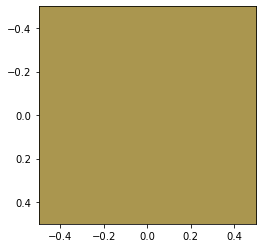

In [47]:

for img_path in ["../chrome1x.png"]:
    img = Image.open(img_path)
    img_data =  torch.from_numpy(np.array(img)).float() / 255

    avg_alpha = img_data[:,:,3].mean()
    avg_rgb = (img_data[:,:,:3]*img_data[:,:,3:4]).sum([0,1])/(img_data[:,:,3].sum())
    avg_color = (torch.tensor([*avg_rgb,avg_alpha])*255).byte()

    print(avg_color)
    plt.imshow(avg_color[:3].reshape(1,1,3))
    plt.show()

